In [7]:
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt
import os

print("Libraries loaded!")

Libraries loaded!


In [8]:
city = 'Delhi'
file_path = f'../data/processed/{city}.csv'

df = pd.read_csv(file_path)

# Prophet requires columns to be exactly named 'ds' (Date) and 'y' (Target)
df_prophet = df.rename(columns={'Date': 'ds', 'AQI': 'y'})

print(f"Data prepared for Prophet. Rows: {len(df_prophet)}")
print(df_prophet.head())

Data prepared for Prophet. Rows: 2009
           ds      y
0  2015-01-01  472.0
1  2015-01-02  454.0
2  2015-01-03  143.0
3  2015-01-04  319.0
4  2015-01-05  325.0


In [9]:
# Initialize Prophet
# yearly_seasonality=True is CRITICAL for AQI data because pollution repeats every winter
model = Prophet(yearly_seasonality=True, daily_seasonality=False)

print(f"Training model for {city}...")
model.fit(df_prophet)
print("Training complete!")

Training model for Delhi...


10:25:06 - cmdstanpy - INFO - Chain [1] start processing
10:25:06 - cmdstanpy - INFO - Chain [1] done processing


Training complete!


In [10]:
# Create a dataframe that extends 365 days into the future
future = model.make_future_dataframe(periods=365)

# Predict
forecast = model.predict(future)

# Show the last 5 rows (the future!)
print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail())

             ds       yhat  yhat_lower  yhat_upper
2369 2021-06-27  12.273934  -77.956089  102.022167
2370 2021-06-28   5.643812  -85.358236   99.118736
2371 2021-06-29   4.734144  -84.126920   93.759828
2372 2021-06-30   5.722264  -86.935433   93.632285
2373 2021-07-01   5.456182  -82.956952   93.980803


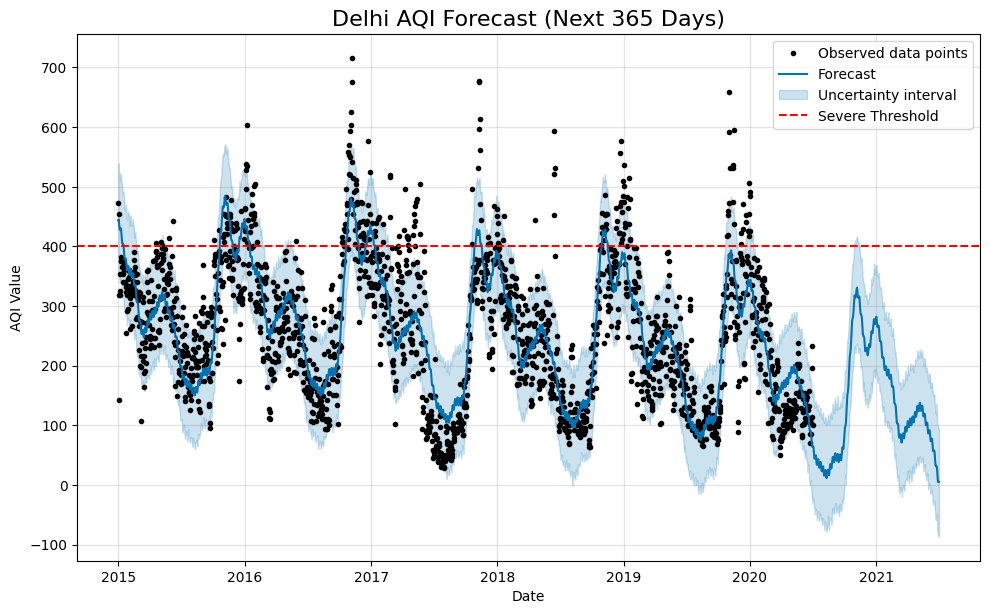

In [11]:
# Plot the forecast
fig1 = model.plot(forecast)
plt.title(f'{city} AQI Forecast (Next 365 Days)', fontsize=16)
plt.xlabel('Date')
plt.ylabel('AQI Value')
plt.axhline(y=400, color='red', linestyle='--', label='Severe Threshold')
plt.legend()
plt.show()

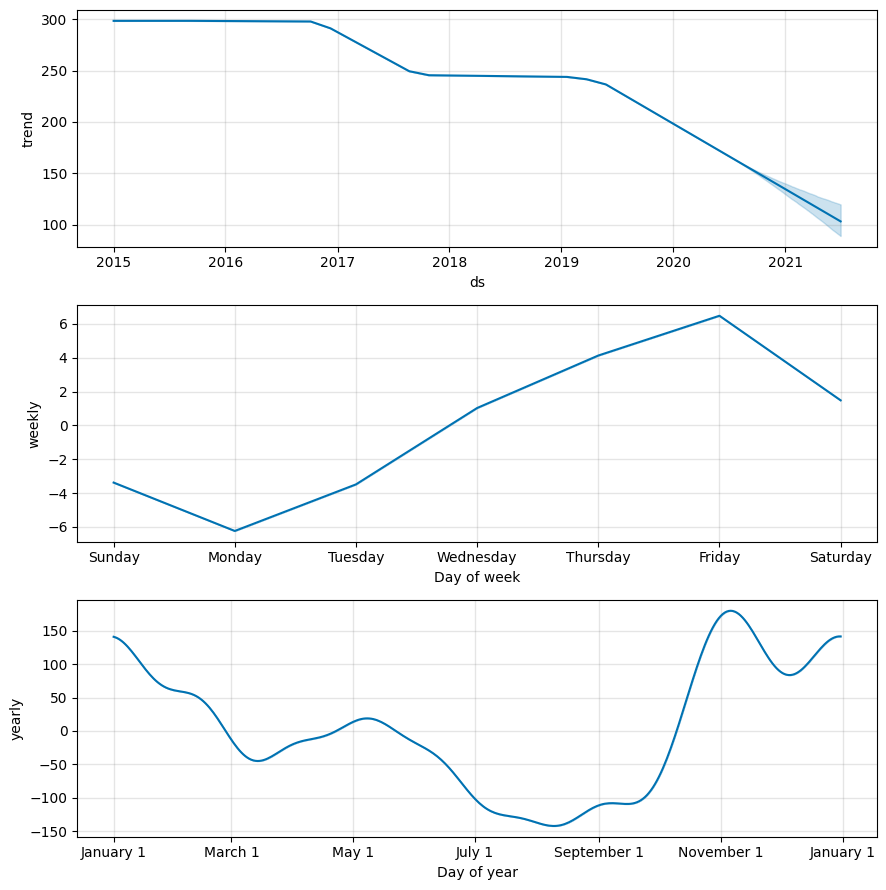

In [12]:
# This plot separates the overall trend from the yearly pattern
fig2 = model.plot_components(forecast)
plt.show()